# Car Price Prediction
   ## - Multiple Linear Regression Model

A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

The company wants to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting car pricing in the American market, as they may differ from the Chinese market. 

The company wants to know the following things:

- Which variables are significant in predicting the price of a car?
- How well do those variables describe the price of a car?

`We are building a multiple linear regression model for the prediction of car prices with the help of Car Data with their specification offered by American companies in the USA market.`

### Steps involved:
- Reading and Understanding Data
- Data Visualization
- Data Preparation
- Splitting the Data into Training and Testing Sets
- Model Building
- Residual Analysis of the train data
- Making Predictions Using the Final Model
- Model Evaluation

## Step-1 : Reading and Understanding Data

First import all the required libraries -

In [100]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
# Reading the data
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [102]:
#check the size
cars.shape

(205, 26)

In [103]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0                     205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [104]:
# Get the summary of data
cars.describe()

,,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Hence, there are no null values in the data. Data looks good.

## Step 2 - Data Visualization

__Let's visualize all the numeric columns.__ <br>
For that let's plot a pairplot.

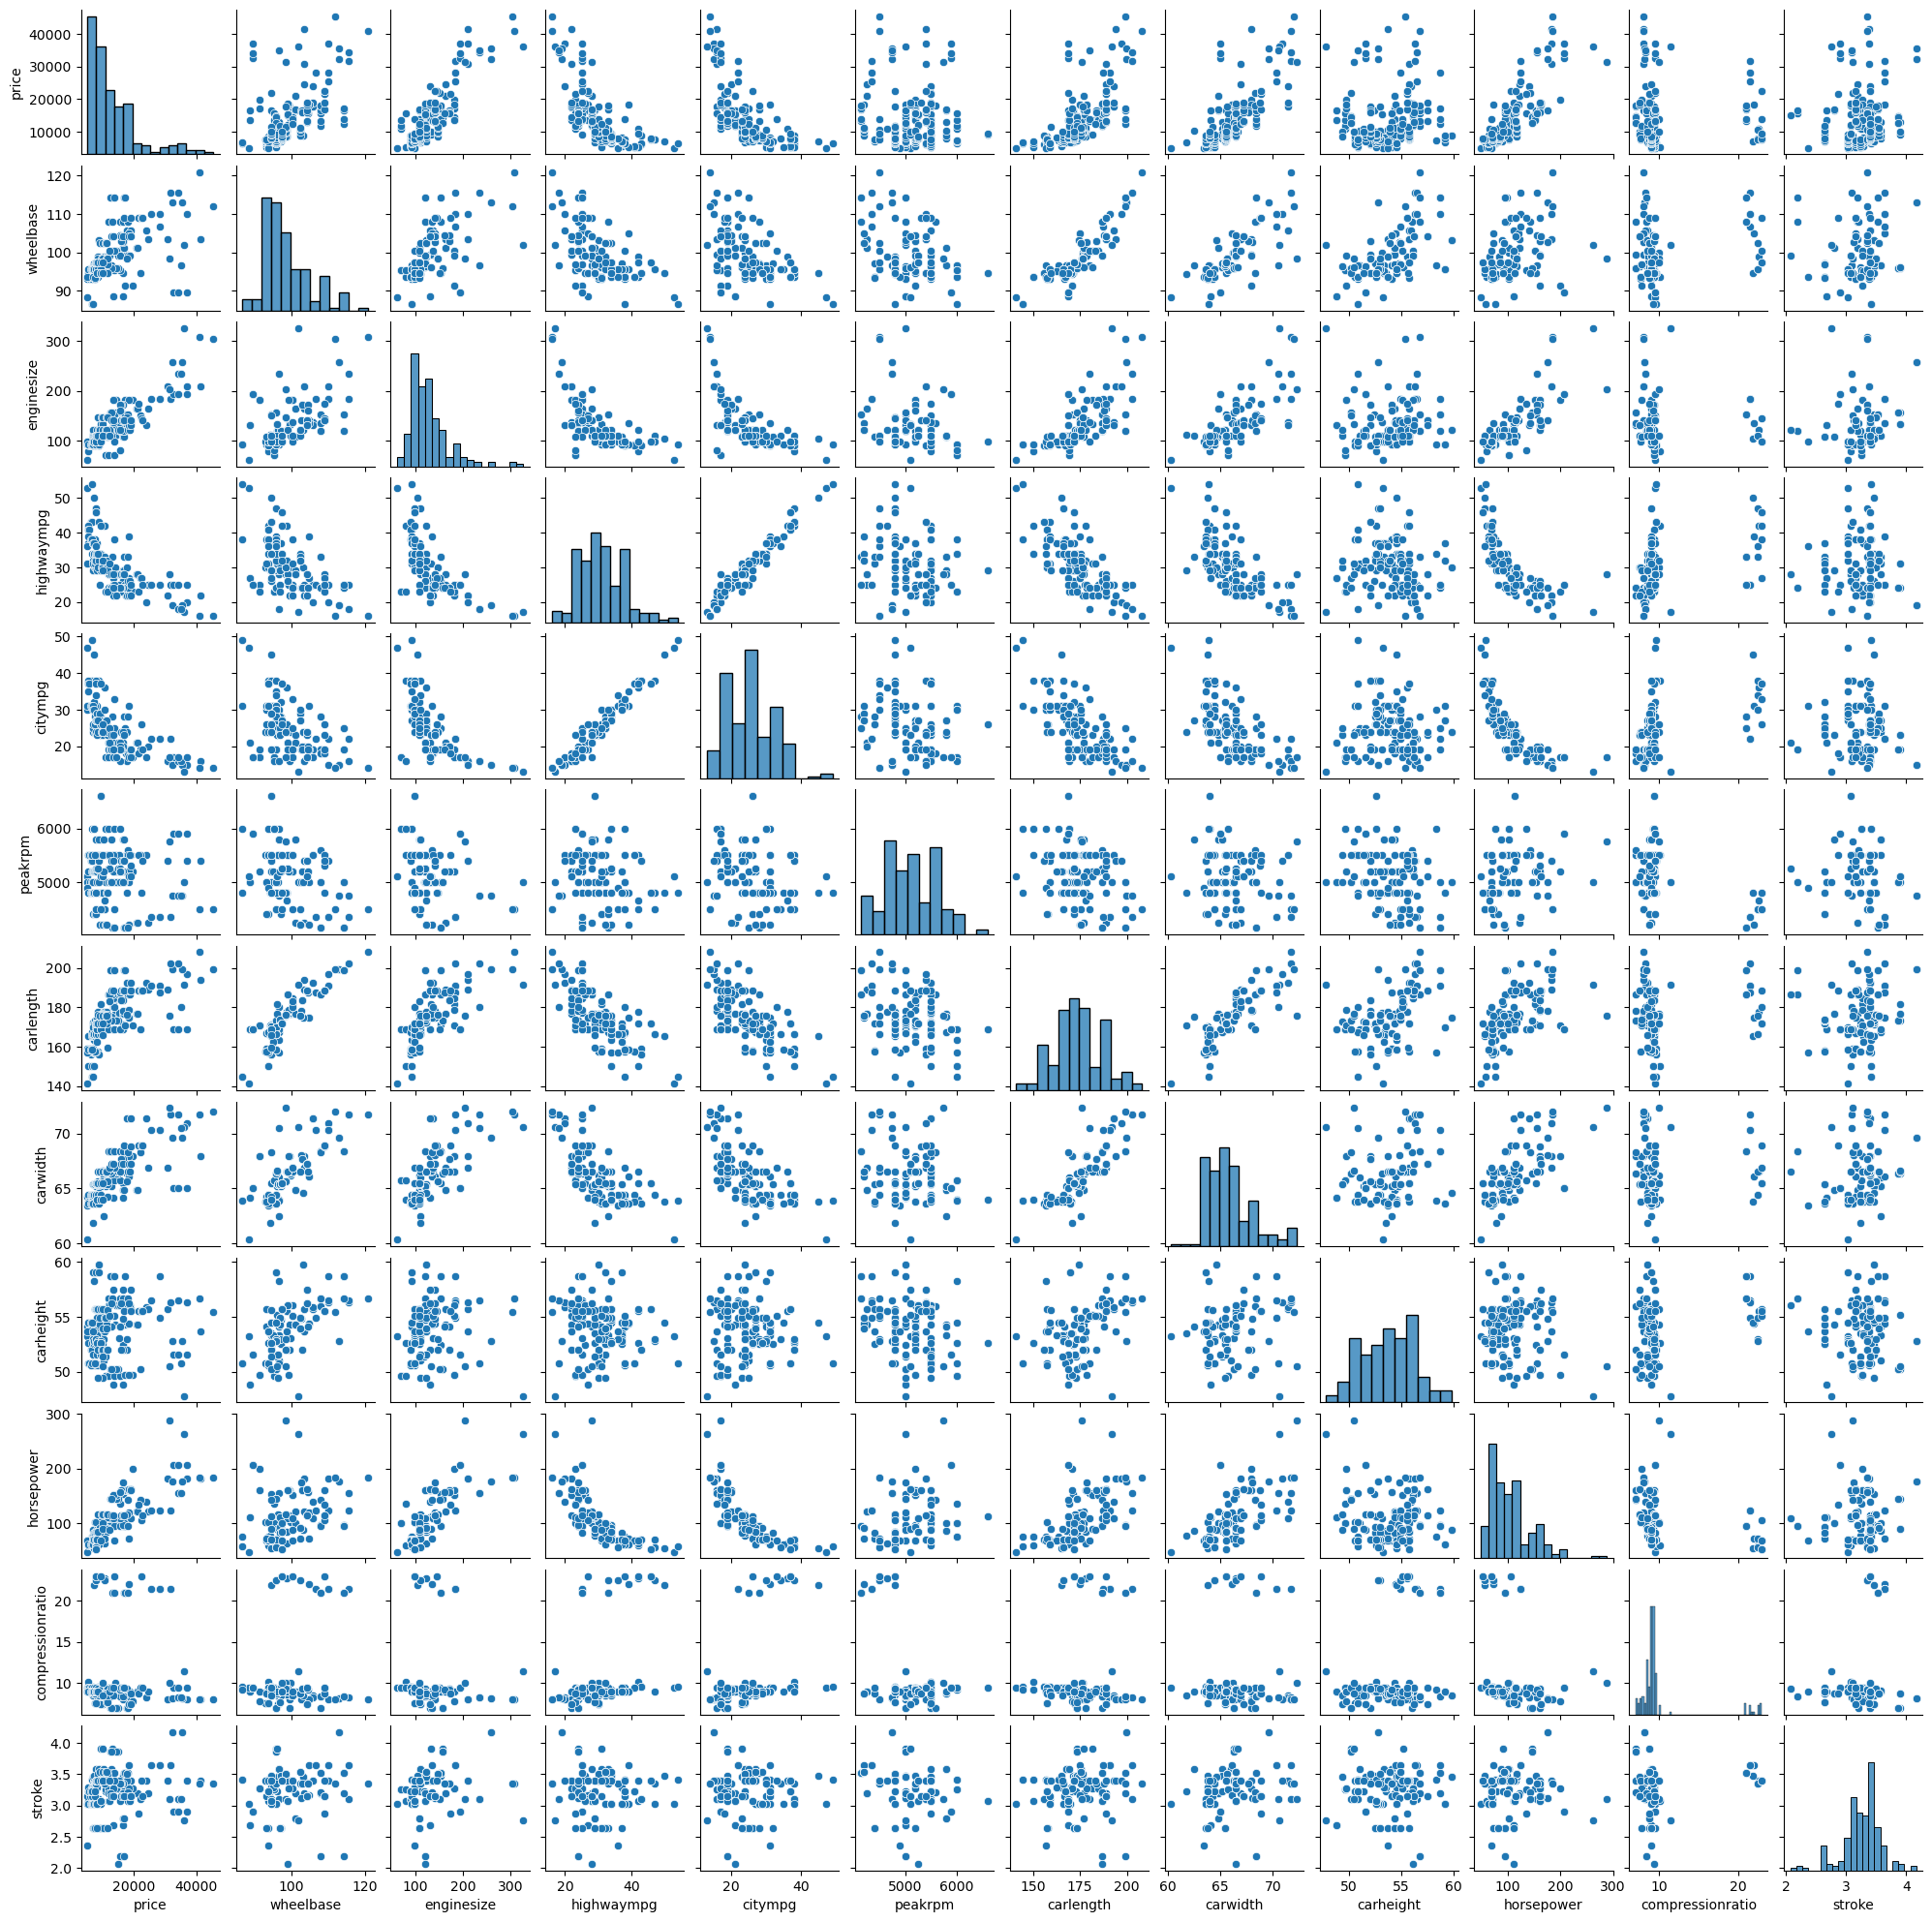

In [105]:
# Let's make a list of important numeric variables 
car_num = cars[['price','wheelbase','enginesize','highwaympg','citympg','peakrpm','carlength','carwidth','carheight','horsepower','compressionratio','stroke']]

# Plot pairplot of the numeric variables
plt.style.use("default")

pairplot = sns.pairplot(car_num)
pairplot.fig.set_size_inches(20,20)
plt.show()

We can also look at the correlation of data.

In [106]:
# calculate the correlation
cars.corr()

,,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


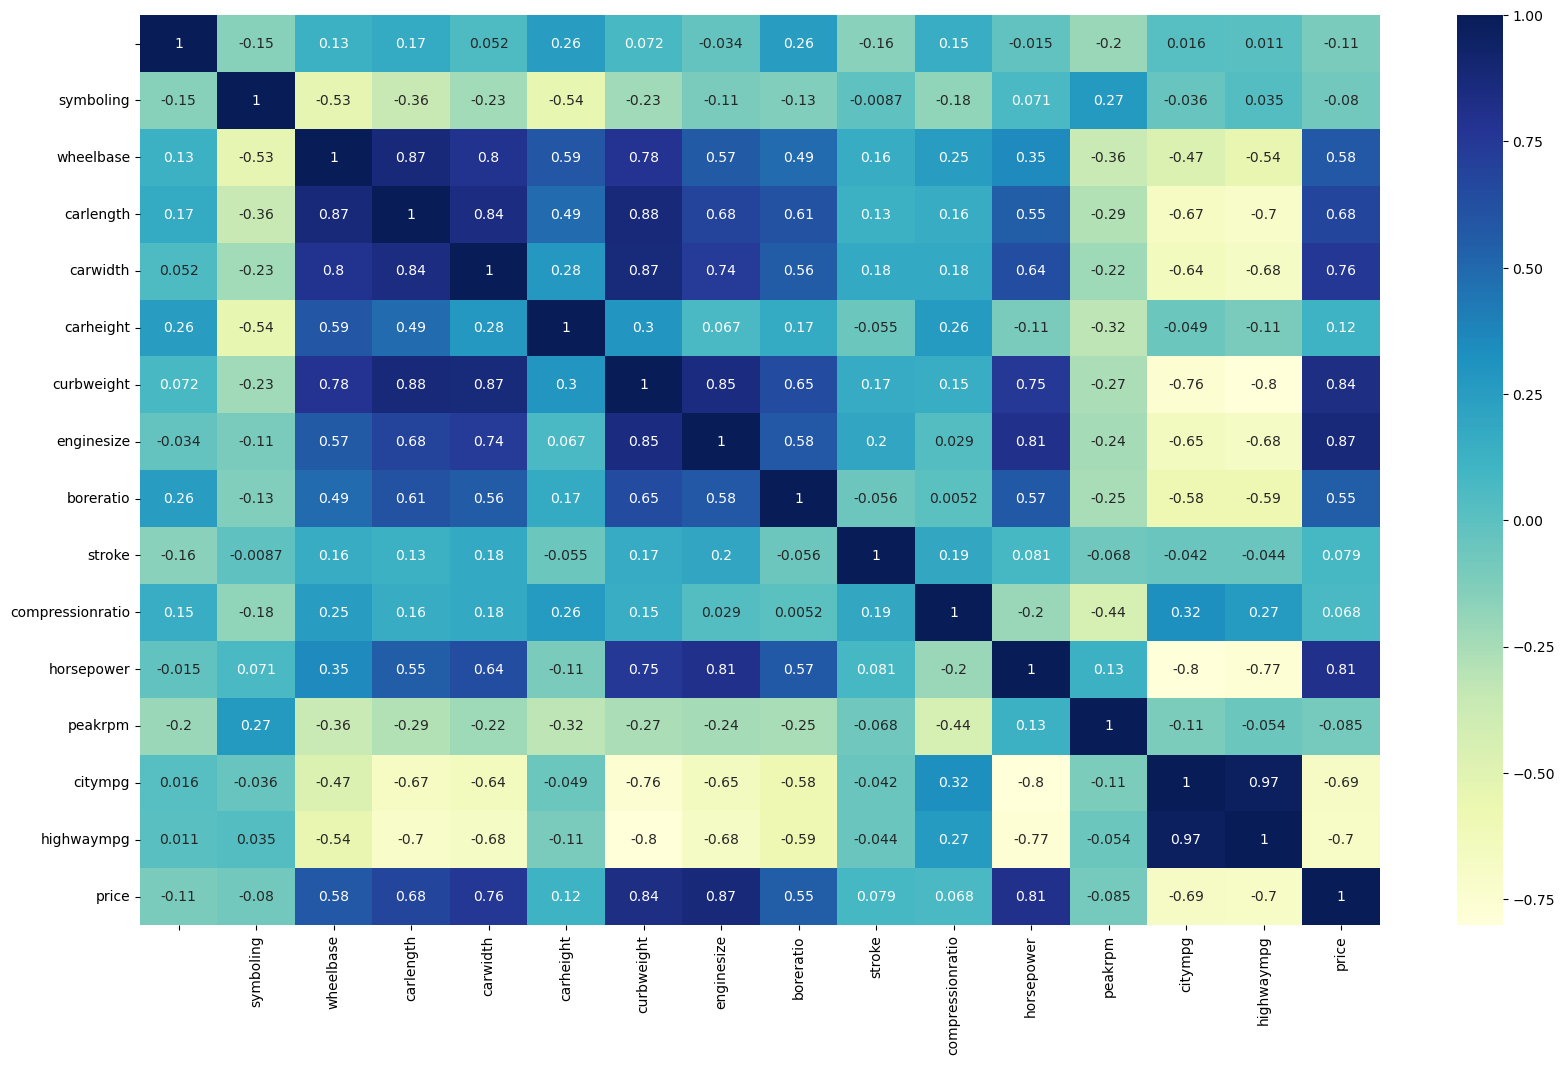

In [107]:
# Plot a heatmap
plt.figure(figsize = (20, 26))
plt.subplot(2, 1, 1)
sns.heatmap(cars.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above correlation plot we see that there are some variables that are highly correlated while some have negative correlation values.

As we are predicting the price here, lets see how price correlates with the other variables - From the above plot we observe that

- price is negatively correlated with symboling, peakrpm, citympg and highwaympg.
- price has a very low correlation with carheight, stroke and compressionratio.
- price shows a decent correlation with wheelbase, carlength, boreratio.
- price is highly correlated to carwidth, crubweight, enginesize and horsepower.

__Now let's visualize the categorical variables against 'price'-the Target variable__

Let's make boxplots againsts 'price' variable

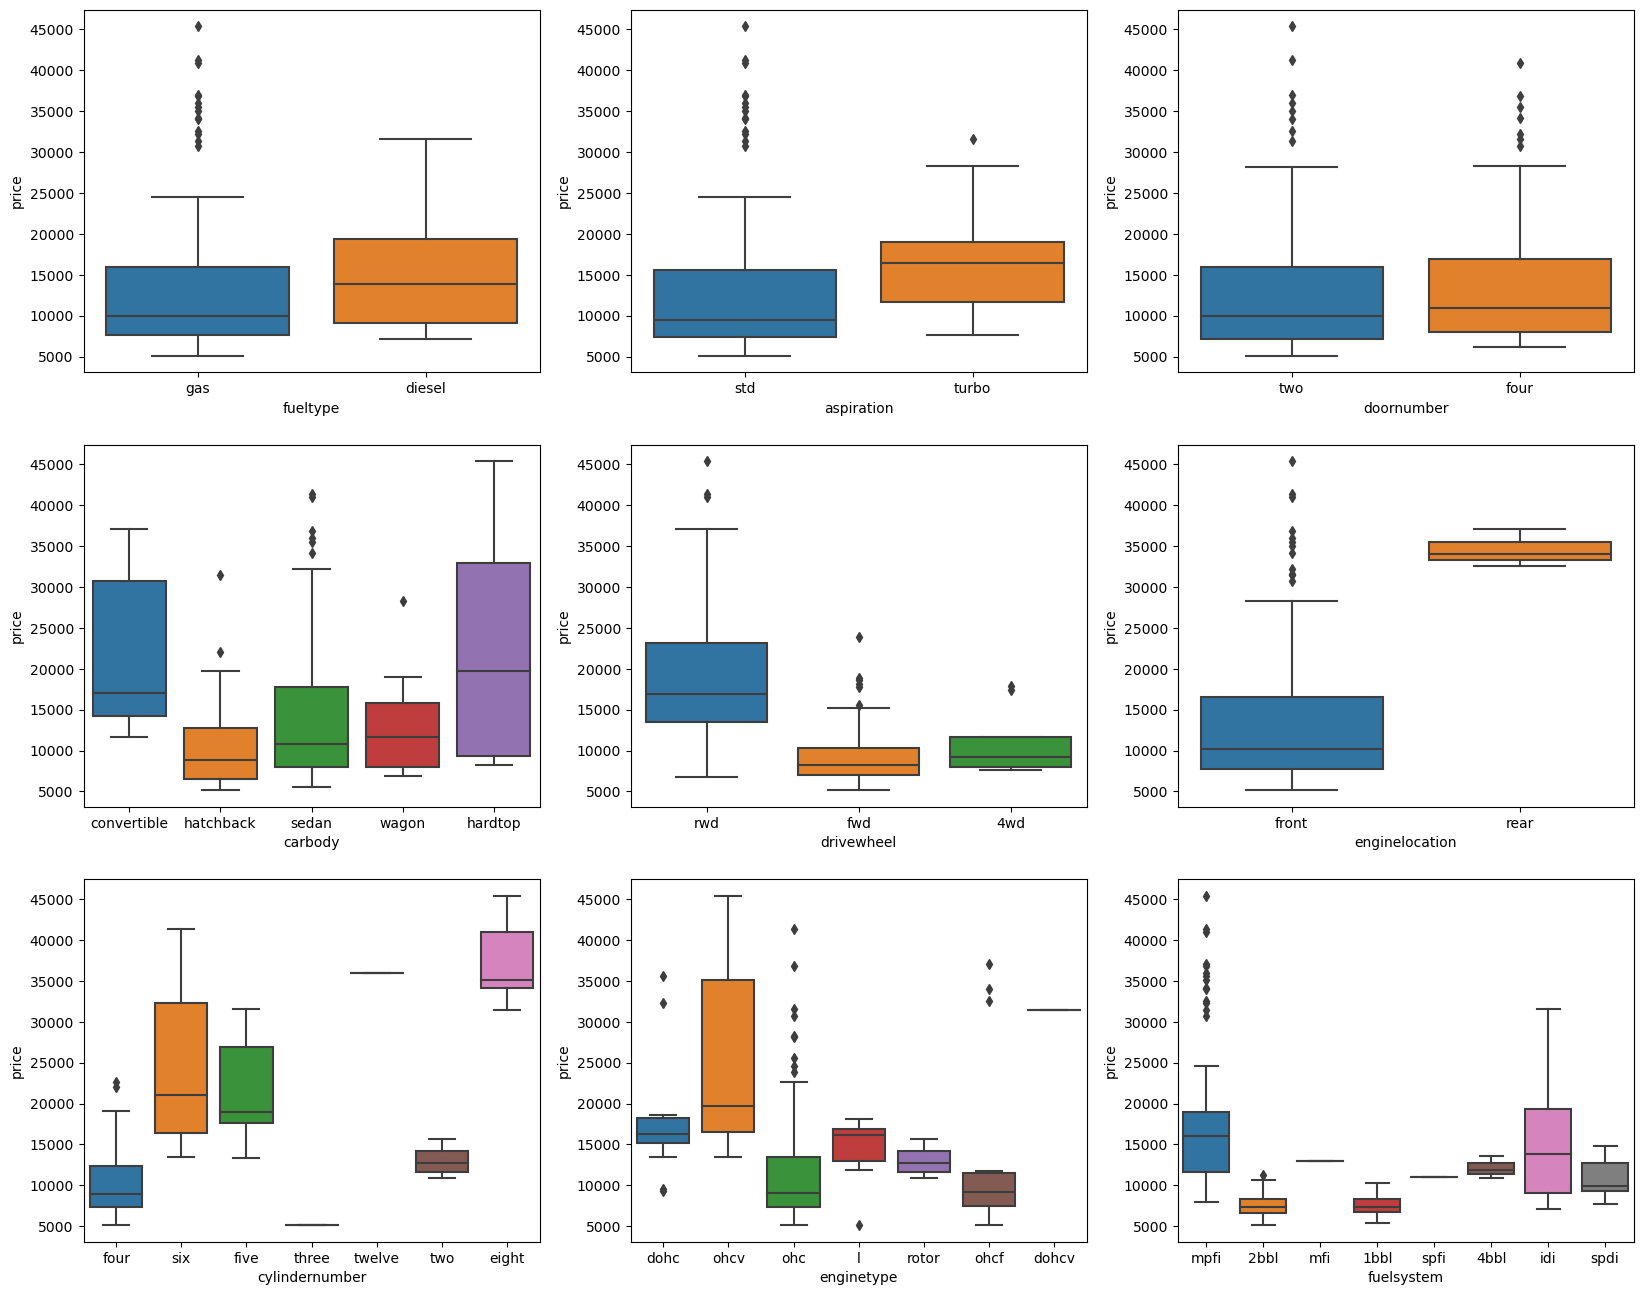

In [108]:
plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(3,3,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(3,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.show()

From the above boxplots, we can see many fluctuations in various variables across the price range.
- `fueltype`, `aspiration` and `doornumber`does not show a significant change with price. Their median is also nearby.
- In `carbody` variable, convertible and hardtop bodies are expensive. Also cars with Rear Wheel Drive(rwd) type `drivewheel` and rear `engineloacation` have very high prices.
- Eight `cylinder` cars are the most expensive.

## Step 3 - Data Preparation

Now, let's clean the dataset.

### Splitting CarName

In [109]:
# Check values in CarName column
cars.CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

We can see that `CarName` column contains the car company name and the model name together.
So we can seperate the name of Car Company and model from `CarName` column.

In [110]:
# Creating a column company with the Car company names 
cars["company"] = cars["CarName"].str.split(" ").str[0]

In [111]:
cars.head()

,,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [112]:
# Checking values in company column
cars.company.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company, dtype: int64

Let's drop `CarName` variable

In [113]:
cars = cars.drop('CarName', axis=1)
cars = cars.drop(cars.columns[0], axis=1)

We can see here, There are some repetitions in company names because of the spelling mistakes like;

`toyota` : `toyouta` <br>
`nissan` : `Nissan` <br>
`porsche` : `porcsche` <br>
`mazda` : `maxda` <br>
`volkswagen` : `vw, vokswagen` <br>

We have to replace the wrong values with actual names.

In [114]:
# Replacing the wrong values by correct ones

cars["company"] = cars["company"].replace(["toyouta", "Nissan", "porcsche", "maxda", "vw", "vokswagen"], ["toyota", "nissan", "porsche", "mazda", "volkswagen", "volkswagen"])

In [115]:
# Checking values in company column
cars.company.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
porcshce        1
Name: company, dtype: int64

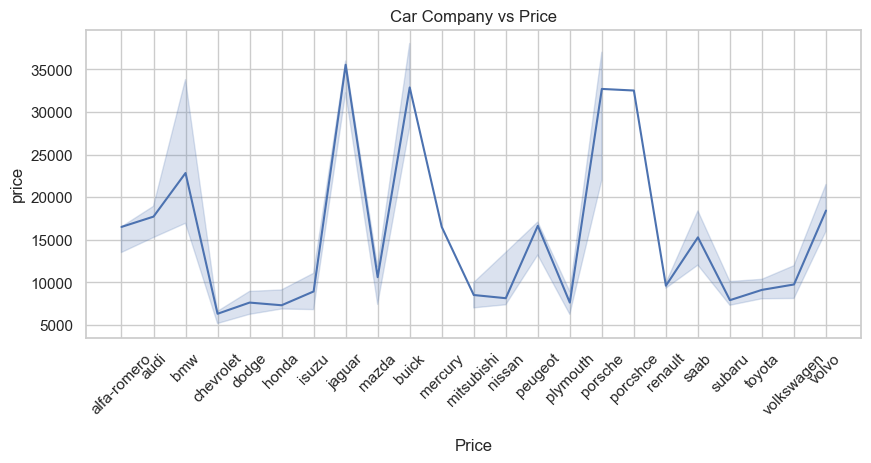

In [116]:
#plot a lineplot
plt.figure(figsize=[10,4])
sns.set(style = "whitegrid")

sns.lineplot(x='company', y='price', data=cars, estimator=np.median)
plt.xticks(rotation=45)
plt.title('Car Company vs Price')
plt.xlabel('Car Company', labelpad = 15)
plt.xlabel('Price', labelpad = 15)
plt.show()

__Now, let's look at column 'doornumber' and 'cylindernumber'__

### Converting categorical variables into numeric type

##### doornumber variable

In [117]:
# Check value counts for "doornumber" column
cars.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

We can change the type of these values into numeric types.

In [118]:
# Mapping the categorical types to numeric ones
cars["doornumber"] = cars["doornumber"].map({'four':4, 'two':2})

In [119]:
# Check value counts for "doornumber" column
cars.doornumber.value_counts()

4    115
2     90
Name: doornumber, dtype: int64

##### cylindernumber variable

In [120]:
# Check value counts for "cylindernumber" column
cars.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [121]:
# Mapping the categorical types to numeric ones
cars["cylindernumber"] = cars["cylindernumber"].map({'four':4, 'six':6, 'five':5, 'eight':8, 'two':2, 'three':3, 'twelve':12})

In [122]:
cars.cylindernumber.value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

__Done!!__ <br> __Now we can look at other categorical variables__

##### symboling varriable

We observe that the column `symboling` has values ranging from -3 to 3. These values indicate assigned insurance risk rating, '-3' being high risk and '3 being pretty safe. Let us scale of the ratings. Let us denote-3 i.e. high risk as 0,-2 i.e. medium risk as 1 and so on. Thus, now our `symboling` column is in the range 0 to 6 where 0 denotes high risk and 6 denotes pretty safe.

In [123]:
rating_dict = {-3: 0,-2:1 ,-1: 2, 0: 3,1: 4,2: 5,3: 6}

cars['symboling'] = cars['symboling'].map(rating_dict)


In [124]:
cars.drop(columns=["peakrpm","stroke","carheight"],inplace=True)

### Fuel economy

Cars come with information about fuel economy. This is usually presented by a combined number which is addition of some % of city mpg and highway mpg.
- __City MPG__: This number is the average MPG for your car in the city.
- __Highway MPG__: Highway MPG is the average MPG for your car on the highway.

We know that Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%. Therefore,

`Fuel economy = 0.45 x highway mileage + 0.55 x city mileage`

In [125]:
# Create a new column 'fuel_economy'
cars["fuel_economy"] = (0.45 * cars['highwaympg']) + (0.55 * cars['citympg'])

# check head
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price,company,fuel_economy
0,6,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,9.0,111,21,27,13495.0,alfa-romero,23.70
1,6,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,9.0,111,21,27,16500.0,alfa-romero,23.70
2,4,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,9.0,154,19,26,16500.0,alfa-romero,22.15
3,5,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,10.0,102,24,30,13950.0,audi,26.70
4,5,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,8.0,115,18,22,17450.0,audi,19.80


### Dummy variables

Now, let's create dummy variables for class. We will get three columns off which we'll keep only two.

In [126]:
# Subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])

cars_categorical.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [127]:
# Convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)

cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Now we can drop the categorical columns from cars dataset__

In [128]:
# Drop categorical variable columns
cars = cars.drop(list(cars_categorical.columns), axis=1)


Concatenating both the datasets

In [129]:
# Concatenate dummy variables with X
cars = pd.concat([cars, cars_dummies], axis=1)

In [130]:
# Let's check the first few rows
cars.head()

,symboling,doornumber,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,compressionratio,...,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,6,2,88.6,168.8,64.1,2548,4,130,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
1,6,2,88.6,168.8,64.1,2548,4,130,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
2,4,2,94.5,171.2,65.5,2823,6,152,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
3,5,4,99.8,176.6,66.2,2337,4,109,3.19,10.0,...,0,0,0,0,0,0,0,0,0,0
4,5,4,99.4,176.6,66.4,2824,5,136,3.19,8.0,...,0,0,0,0,0,0,0,0,0,0


This is the final dataset which we are going to use for model building.

## Step 4 - Splitting the Data into Training and Testing Sets

In [131]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

In [132]:
# divide the data into 70/30 % to train and test data respectively.
df_train, df_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state = 100)

In [133]:
df_train.shape

(143, 59)

In our dataset, all the columns do not have comparable scales.<br>
If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.<br>
So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

Here we will perform MinMax scaling to all the columns except the 'yes-no' and 'dummy' variables

In [134]:
scaler = MinMaxScaler()

In [135]:
# apply scaler to the columns
num_vars = ['symboling','wheelbase','carlength','carwidth','curbweight','enginesize',
            'boreratio','compressionratio','horsepower','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [136]:
 df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,compressionratio,...,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
122,0.6,4,0.244828,0.426016,0.291667,0.272692,4,0.139623,0.230159,0.15000,...,0,1,0,0,0,0,0,0,0,0
125,1.0,2,0.272414,0.452033,0.666667,0.500388,4,0.339623,1.000000,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,0.6,2,0.272414,0.448780,0.308333,0.314973,4,0.139623,0.444444,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,2,0.068966,0.450407,0.316667,0.411171,4,0.260377,0.626984,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.2,4,0.610345,0.775610,0.575000,0.647401,4,0.260377,0.746032,0.03125,...,0,0,0,0,0,0,0,0,0,1


In [137]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,compressionratio,...,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,3.118881,0.411141,0.525476,0.461655,0.407878,4.405594,0.241351,0.497946,0.190787,...,0.055944,0.027972,0.0,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.996399,0.205581,0.204848,0.184517,0.211269,1.158178,0.154619,0.207140,0.237181,...,0.230621,0.165472,0.0,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,0.272414,0.399187,0.304167,0.245539,4.000000,0.135849,0.305556,0.100000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,4.000000,0.341379,0.502439,0.425000,0.355702,4.000000,0.184906,0.500000,0.125000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,4.000000,0.503448,0.669919,0.550000,0.559542,4.000000,0.301887,0.682540,0.150000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__Now let's divide the train dataset into X and y sets for model building__

In [138]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5 - Model Building

We will be using Recursive feature elimination technique(RFE)

__Adopting RFE technique to select the features__

In [139]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()

rfe1 = RFE(lm, n_features_to_select=10)                # running RFE

rfe1.fit(X_train, y_train)

print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False  True  True  True False False False False  True False
 False False False False False False False False False False  True False
 False False  True False False False False False False False False False
 False  True  True False False False False  True False False False False
 False False False False False False  True False False False]
[36 44  8  1  1  1 39 18 16 14  1 11 29 42 17 33  6  4  7  5 38 21  1 10
  3 37  1 41 12 43 20 13 46 22 34 47 45  1  1 27 28 23 40  1 26 49 19 31
  2 30 48  9 25 15  1 24 32 35]


In [140]:
# Subset the features selected by rfe1
col = X_train.columns[rfe1.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'horsepower',
       'enginelocation_rear', 'enginetype_ohcf', 'company_bmw',
       'company_buick', 'company_jaguar', 'company_subaru'],
      dtype='object')

__Building model using statsmodel, for the detailed statistics__

##### MODEL 1

In [141]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

# Adding a constant variable  
X_train_1 = sm.add_constant(X_train_1)

lm_1 = sm.OLS(y_train,X_train_1).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     186.5
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           6.79e-71
Time:                        20:11:32   Log-Likelihood:                 203.66
No. Observations:                 143   AIC:                            -387.3
Df Residuals:                     133   BIC:                            -357.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1150      0.016     -7.045      0.000      -0.147      -0.083
carlength              -0.1359      0.066     -2.054      0.042      -0.267      -0.005
carwidth                0.3855      0.068      5.682      0.000       0.251       0.520
curbweight              0.3371      0.081      4.166      0.000       0.177       0.497
horsepower              0.2836      0.059      4.767      0.000       0.166       0.401
enginelocation_rear     0.3246      0.044      7.399      0.000       0.238       0.411
enginetype_ohcf         0.1458      0.023      6.406      0.000       0.101       0.191
company_bmw             0.3083      0.027     11.424      0.000       0.255       0.362
company_buick           0.2113      0.035      6.099      0.000       0.143       0.280
company_jaguar          0.2264      0.041      5.502      0.000       0.145       0.308
company_subaru         -0.1788      0.025     -7.140      0.000      -0.228      -0.129
==============================================================================
Omnibus:                       37.354   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.717
Skew:                           1.087   Prob(JB):                     4.02e-19
Kurtosis:                       6.081   Cond. No.                     2.81e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.21e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [142]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_1.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginelocation_rear,inf
5,enginetype_ohcf,inf
9,company_subaru,inf
2,curbweight,52.03
0,carlength,49.78
1,carwidth,38.80
3,horsepower,10.94
7,company_buick,1.55
8,company_jaguar,1.37
6,company_bmw,1.20


Looking at the statistics of model 1, we observe that variables `enginelocation_rear`, `company_subaru` and `enginetype_ohcf` has infinite VIF. Let's go ahead and drop `company_subaru` & build a new model with the remaining variables.

##### MODEL 2

In [143]:
X_train_2 = X_train_1.drop(['company_subaru'], axis = 1)

# Adding a constant variable  
X_train_2 = sm.add_constant(X_train_2)

lm_2 = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     186.5
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           6.79e-71
Time:                        20:11:39   Log-Likelihood:                 203.66
No. Observations:                 143   AIC:                            -387.3
Df Residuals:                     133   BIC:                            -357.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1150      0.016     -7.045      0.000      -0.147      -0.083
carlength              -0.1359      0.066     -2.054      0.042      -0.267      -0.005
carwidth                0.3855      0.068      5.682      0.000       0.251       0.520
curbweight              0.3371      0.081      4.166      0.000       0.177       0.497
horsepower              0.2836      0.059      4.767      0.000       0.166       0.401
enginelocation_rear     0.5034      0.068      7.434      0.000       0.369       0.637
enginetype_ohcf        -0.0330      0.019     -1.722      0.087      -0.071       0.005
company_bmw             0.3083      0.027     11.424      0.000       0.255       0.362
company_buick           0.2113      0.035      6.099      0.000       0.143       0.280
company_jaguar          0.2264      0.041      5.502      0.000       0.145       0.308
==============================================================================
Omnibus:                       37.354   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.717
Skew:                           1.087   Prob(JB):                     4.02e-19
Kurtosis:                       6.081   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,52.03
0,carlength,49.78
1,carwidth,38.80
3,horsepower,10.94
7,company_buick,1.55
8,company_jaguar,1.37
4,enginelocation_rear,1.25
6,company_bmw,1.20
5,enginetype_ohcf,1.18


`curbweight`can be dropped as it has high VIF.

##### MODEL 3

In [145]:
X_train_3 = X_train_2.drop(["curbweight"], axis = 1)

# Adding a constant variable  
X_train_3 = sm.add_constant(X_train_3)

lm_3 = sm.OLS(y_train,X_train_3).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     185.0
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.63e-68
Time:                        20:11:44   Log-Likelihood:                 194.89
No. Observations:                 143   AIC:                            -371.8
Df Residuals:                     134   BIC:                            -345.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1282      0.017     -7.559      0.000      -0.162      -0.095
carlength               0.0498      0.052      0.961      0.338      -0.053       0.152
carwidth                0.4259      0.071      5.987      0.000       0.285       0.567
horsepower              0.4232      0.052      8.131      0.000       0.320       0.526
enginelocation_rear     0.4937      0.072      6.886      0.000       0.352       0.635
enginetype_ohcf        -0.0365      0.020     -1.802      0.074      -0.077       0.004
company_bmw             0.3085      0.029     10.794      0.000       0.252       0.365
company_buick           0.2679      0.034      7.932      0.000       0.201       0.335
company_jaguar          0.2793      0.041      6.740      0.000       0.197       0.361
==============================================================================
Omnibus:                       38.991   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.985
Skew:                           1.174   Prob(JB):                     1.57e-18
Kurtosis:                       5.871   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,38.55
0,carlength,28.25
2,horsepower,7.29
3,enginelocation_rear,1.25
6,company_buick,1.23
7,company_jaguar,1.21
5,company_bmw,1.20
4,enginetype_ohcf,1.17


`carlength` has high VIF and considerably high p-value, which makes it insignificant. So it can be dropped

##### MODEL 4

In [147]:
X_train_4 = X_train_3.drop(["carlength"], axis = 1)

# Adding a constant variable  
X_train_4 = sm.add_constant(X_train_4)

lm_4 = sm.OLS(y_train,X_train_4).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     211.4
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.70e-69
Time:                        20:11:59   Log-Likelihood:                 194.40
No. Observations:                 143   AIC:                            -372.8
Df Residuals:                     135   BIC:                            -349.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1245      0.017     -7.540      0.000      -0.157      -0.092
carwidth                0.4775      0.047     10.248      0.000       0.385       0.570
horsepower              0.4157      0.051      8.080      0.000       0.314       0.517
enginelocation_rear     0.4968      0.072      6.940      0.000       0.355       0.638
enginetype_ohcf        -0.0361      0.020     -1.784      0.077      -0.076       0.004
company_bmw             0.3157      0.028     11.448      0.000       0.261       0.370
company_buick           0.2637      0.033      7.876      0.000       0.197       0.330
company_jaguar          0.2843      0.041      6.915      0.000       0.203       0.366
==============================================================================
Omnibus:                       39.371   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.023
Skew:                           1.185   Prob(JB):                     9.37e-19
Kurtosis:                       5.884   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_4.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,7.03
0,carwidth,6.58
2,enginelocation_rear,1.25
6,company_jaguar,1.20
3,enginetype_ohcf,1.17
5,company_buick,1.16
4,company_bmw,1.12


Let's drop `horsepower`.

##### MODEL 5

In [149]:
X_train_5 = X_train_4.drop(["horsepower"], axis = 1)

# Adding a constant variable  
X_train_5 = sm.add_constant(X_train_5)

lm_5 = sm.OLS(y_train,X_train_5).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     160.1
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           4.23e-59
Time:                        20:12:03   Log-Likelihood:                 166.19
No. Observations:                 143   AIC:                            -318.4
Df Residuals:                     136   BIC:                            -297.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1504      0.020     -7.648      0.000      -0.189      -0.111
carwidth                0.7312      0.042     17.498      0.000       0.649       0.814
enginelocation_rear     0.7051      0.081      8.698      0.000       0.545       0.865
enginetype_ohcf        -0.0424      0.025     -1.728      0.086      -0.091       0.006
company_bmw             0.3626      0.033     11.079      0.000       0.298       0.427
company_buick           0.2175      0.040      5.434      0.000       0.138       0.297
company_jaguar          0.3779      0.048      7.893      0.000       0.283       0.473
==============================================================================
Omnibus:                       23.775   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.499
Skew:                           0.796   Prob(JB):                     1.61e-09
Kurtosis:                       5.064   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_5.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,1.36
2,enginetype_ohcf,1.16
4,company_buick,1.15
1,enginelocation_rear,1.09
3,company_bmw,1.07
5,company_jaguar,1.07


`enginetype_ohcf` still has high p-value and it becomes insignificant. Let's drop this.

##### MODEL 6

In [151]:
X_train_6 = X_train_5.drop(["enginetype_ohcf"], axis = 1)

# Adding a constant variable  
X_train_6 = sm.add_constant(X_train_6)

lm_6 = sm.OLS(y_train,X_train_6).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     188.8
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.27e-59
Time:                        20:12:09   Log-Likelihood:                 164.64
No. Observations:                 143   AIC:                            -317.3
Df Residuals:                     137   BIC:                            -299.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1562      0.020     -8.011      0.000      -0.195      -0.118
carwidth                0.7363      0.042     17.539      0.000       0.653       0.819
enginelocation_rear     0.6665      0.078      8.491      0.000       0.511       0.822
company_bmw             0.3657      0.033     11.112      0.000       0.301       0.431
company_buick           0.2189      0.040      5.429      0.000       0.139       0.299
company_jaguar          0.3796      0.048      7.875      0.000       0.284       0.475
==============================================================================
Omnibus:                       23.861   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.931
Skew:                           0.819   Prob(JB):                     3.52e-09
Kurtosis:                       4.962   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_6.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,1.28
3,company_buick,1.14
4,company_jaguar,1.07
2,company_bmw,1.06
1,enginelocation_rear,1.01


__None of the VIF's are above 5 and from the summary we can see that none of them have significant p-value (> 0.05). So we can conclude that this is our final model.__

## Step 6 - Residual Analysis of the train data

__Normal Distribution of error terms__

To check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [153]:
y_train_pred = lm_6.predict(X_train_6)

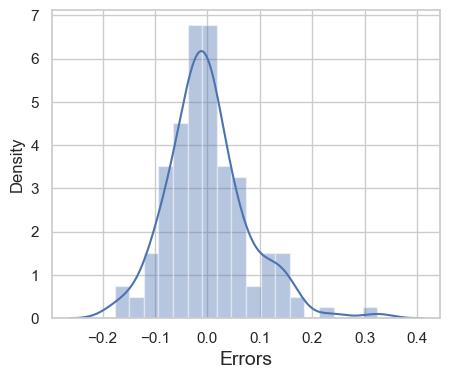

In [154]:
# plot the histogram of the error terms
plt.figure(figsize=[5,4])

sns.distplot((y_train - y_train_pred), bins = 18)
# fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 14) 
plt.show()

__Tests for Heteroscedasticity__

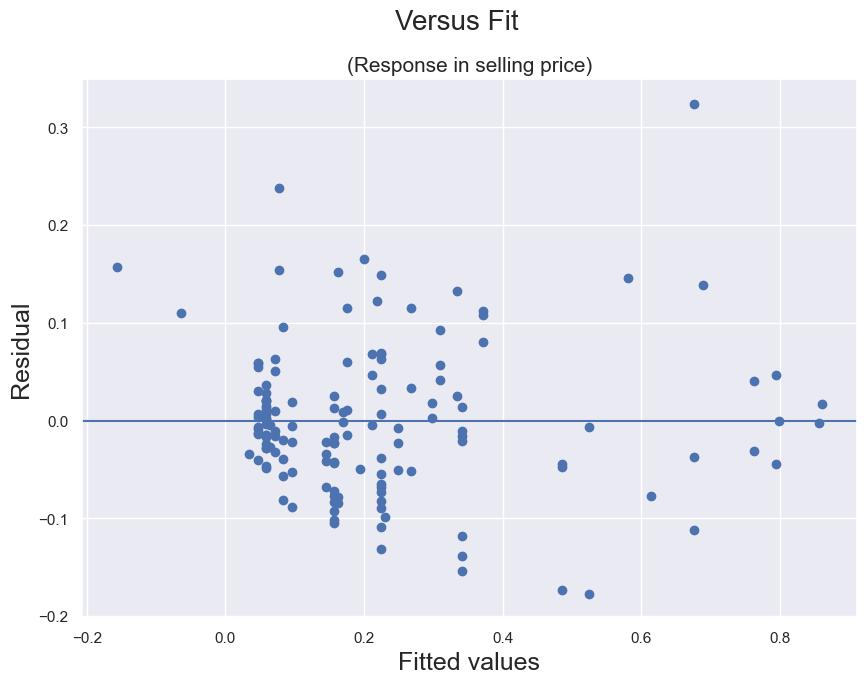

In [155]:
resid = lm_6.resid

sns.set(style = "darkgrid")

fig = plt.figure(figsize = (10,7))
plt.scatter(y_train_pred, resid)
fig.suptitle('Versus Fit', fontsize = 20)  
plt.title('(Response in selling price)',  fontsize = 15)       
plt.xlabel('Fitted values', fontsize = 18)
plt.ylabel('Residual', fontsize = 18)           
plt.axhline(0, 0,8)
plt.show()

We observe that residuals are randomly distributed and there is no definite pattern observed. Thus basic assumption of linear regression for residual terms i.e homoscedasticity is satisfied.

## Step 7 - Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, let us now make predictions using our final model.

__Applying the scaling on the test sets__

In [156]:
# apply scaler to the columns
num_vars = ['symboling','wheelbase','carlength','carwidth','curbweight','enginesize',
            'boreratio','compressionratio','horsepower','citympg','highwaympg','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [157]:
df_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,compressionratio,...,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,3.129032,0.370121,0.486741,0.375212,0.371743,4.322581,0.228835,0.667691,0.209375,...,0.048387,0.048387,0.016129,0.016129,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.271724,0.999736,0.179970,0.183964,0.208977,0.222354,0.882883,0.188416,0.228484,0.273690,...,0.216335,0.216335,0.127000,0.127000,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,0.265306,0.389764,0.221053,0.219125,4.000000,0.126638,0.515873,0.093750,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,4.000000,0.327988,0.475591,0.326316,0.344065,4.000000,0.183406,0.674603,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,4.000000,0.482507,0.642126,0.421053,0.540726,4.000000,0.287118,0.857143,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


__Dividing into X_test and y_test__

In [158]:
y_test = df_test.pop('price')
X_test = df_test

In [159]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
col=X_train_6.columns[1:]
X_test_6 = X_test[col]

In [160]:
# Adding a constant variable 
X_test_6 = sm.add_constant(X_test_6)

In [161]:
X_test_6.shape

(62, 6)

In [162]:
y_pred_6 = lm_6.predict(X_test_6)

In [163]:
# Evaluate the r2
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_train_pred)
print('Coefficient of determination for train data: %.3f' % r2) 

r2 = r2_score(y_test, y_pred_6)
print('Coefficient of determination for test data: %.3f' % r2) 

Coefficient of determination for train data: 0.873
Coefficient of determination for test data: 0.803


## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

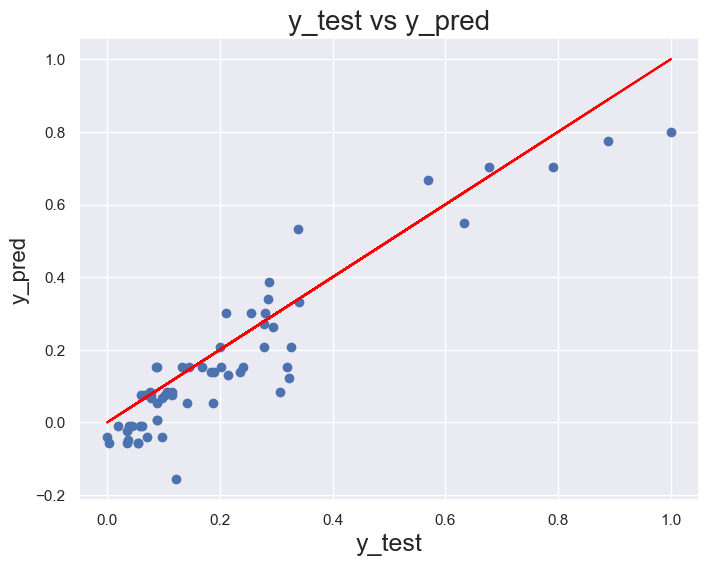

In [164]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=[8,6])
plt.scatter(y_test, y_pred_6)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="red")
plt.show()

It seems like the predicted values are really good. Actual scores and predicted scores have almost perfect linearity. WE might achieve a more better relation if we treat the outliers but since our dataset is small we choose not to deal with them as we might end up loosing vital information.

# Conclusion:

Following are the conclusions based on the model we built. <br>
> 1) R-sqaured and Adjusted R-squared (extent of fit) are 0.873 and 0.869 respectively - 87% variance explained.

> 2) F-stats and Prob(F-stats) (overall model fit) is 188.8 and 1.27e-59(approx. 0.0) respectively.

> 3) p-values for all the coefficients seem to be less than the significance level of 0.05. This indicates that all the predictors are statistically significant.

Thus, we say that themodel will be a good way for management to understand the pricing dynamics of a new market.<br>
Following are the variables that are significant in predicting the price of a car:

- carwidth
- enginelocation_rear
- car company BMW (Cars that are very expensive or high-end)
- car company Buick
- car company Jaguar

We can see that the equation of our best fitted line is:<br><br>
$ price = 0.7363  \times  carwidth  + 0.6665 \times  enginelocation Rear + 0.3657 \times company BMW + 0.2189 \times company Buick + 0.3796 \times company Jaguar - 0.1562 $